In [1]:
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt  # PLOTTING LIBRARY
import numpy as np #NUMPY MATRIXES
import os.path
import pandas as pd #DATA FRAME LIKE EXCEL
import sklearn
from sklearn.mixture import GaussianMixture as GMM
import seaborn as sns #FANCY PLOTTING
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit

from multiprocess import Pool

sns.set() #SEABORN DEFAULTS
%matplotlib inline
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams.update({'font.size': 15, 'font.family': 'Arial'})



folder_path1 = "../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1"
folder_path2 = "../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 2"

# List all files in the folders

file_paths1 = glob.glob(os.path.join(folder_path1, '*.csv'))
file_paths2 = glob.glob(os.path.join(folder_path2, '*.csv'))
filecount1 = int(len(file_paths1))
filecount2 = int(len(file_paths2))
filecountT = filecount1+filecount2
print(filecountT)
print(file_paths1)
print(file_paths2)


110
['../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/011_f14 100_events.csv', '../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/010_f14 75_events.csv', '../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/056_f23 100_events.csv', '../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/008_f14 25_events.csv', '../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/040_f20 75_events.csv', '../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/058_f24 25_events.csv', '../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/057_f24 0_events.csv', '../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/054_f23 50_events.csv', '../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/047_f22 0_events.csv', '../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/025_f17 75_events.csv', '../Full spike DMS Mass Photometry Data/BA.2 Mutant MP events 1/044_f21 50_events.csv', '../Full spike DMS Mass Pho

In [2]:
dfs1 = []
for path in file_paths1:
    # Extract the file name from the path
    file_name = os.path.basename(path)
    file_name_without_extension = os.path.splitext(file_name)[0]
    data = pd.read_csv(path, comment="#", encoding="ISO8859-1")
    data['filename'] = file_name
    tok = file_name.split()
    if len(tok) >= 2:
        # Assuming the second part contains concentration info
        data['conc (nM)'] = float(tok[1].split("_")[0])
        
    else:
        # Handle the case when there isn't enough info
        data['conc (nM)'] = None
    
    if len(tok) >= 1:
        # Assuming the first part contains construct info
        data['construct'] = tok[0][4:]

    else:
        # Handle the case when there isn't enough info
        data['construct'] = None
    if 'masses_kDa' not in data:
        print(file_name)
    dfs1.append(data[['masses_kDa','conc (nM)','construct']])

In [3]:
dfs2 = []
for path in file_paths2:
    # Extract the file name from the path
    file_name = os.path.basename(path)
    file_name_without_extension = os.path.splitext(file_name)[0]
    data = pd.read_csv(path, comment="#", encoding="ISO8859-1")
    data['filename'] = file_name
    tok = file_name.split()
    if len(tok) >= 2:
        # Assuming the second part contains concentration info
        data['conc (nM)'] = float(tok[1].split("_")[0])
        
    else:
        # Handle the case when there isn't enough info
        data['conc (nM)'] = None
    
    if len(tok) >= 1:
        # Assuming the first part contains construct info
        data['construct'] = tok[0][4:]

    else:
        # Handle the case when there isn't enough info
        data['construct'] = None
    if 'masses_kDa' not in data:
        print(file_name)
    dfs2.append(data[['masses_kDa','conc (nM)','construct']])

In [4]:
dfs2[0]

,masses_kDa,conc (nM),construct
0,521.080303,25.0,f24
1,199.680405,25.0,f24
2,219.007904,25.0,f24
3,90.513916,25.0,f24
4,500.237146,25.0,f24
...,...,...,...
9716,497.513204,25.0,f24
9717,519.010591,25.0,f24
9718,-89.862049,25.0,f24
9719,491.299264,25.0,f24


In [5]:
#Creates list of runs in data frame, indexs are the position of run in dfs
runs1 = []
for x in range(filecount1):

    constring = str(dfs1[x].iloc[x][['construct']])
    construct = constring.split()
   
    conc = str(dfs1[x].iloc[x][['conc (nM)']]).split()
    
    run = construct[1]+" "+conc[2][:-2]
    runs1.append(run)
print(runs1)


['f14 100', 'f14 75', 'f23 100', 'f14 25', 'f20 75', 'f24 25', 'f24 0', 'f23 50', 'f22 0', 'f17 75', 'f21 50', 'f18 0', 'f15 50', 'f22 25', 'f49 100', 'f14 0', 'f22 75', 'f18 100', 'f13 50', 'f15 0', 'f17 25', 'f23 0', 'f20 25', 'f18 25', 'f21 100', 'f18 75', 'f49 50', 'f23 25', 'f13 0', 'f20 50', 'f18 50', 'f24 100', 'f13 25', 'f15 100', 'f21 0', 'f20 0', 'f22 100', 'f49 0', 'f21 25', 'f13 100', 'f15 25', 'f23 75', 'f17 100', 'f17 0', 'f17 50', 'f20 100', 'f22 50', 'f24 75', 'f13 75', 'f49 75', 'f14 50', 'f24 50', 'f49 25', 'f21 75', 'f15 75']


In [6]:
#Creates list of runs in data frame, indexs are the position of run in dfs
runs2 = []
for x in range(filecount2):

    constring = str(dfs2[x].iloc[x][['construct']])
    construct = constring.split()
   
    conc = str(dfs2[x].iloc[x][['conc (nM)']]).split()
    
    run = construct[1]+" "+conc[2][:-2]
    runs2.append(run)
print(runs2)


['f24 25', 'f20 75', 'f14 0', 'f24 0', 'f23 75', 'f15 50', 'f13 0', 'f17 25', 'f13 25', 'f22 75', 'f17 100', 'f15 100', 'f17 75', 'f22 25', 'f23 0', 'f13 75', 'f15 0', 'f21 25', 'f21 75', 'f14 50', 'f18 50', 'f13 100', 'f23 25', 'f15 25', 'f18 0', 'f18 25', 'f18 100', 'f49 50', 'f22 0', 'f24 75', 'f20 25', 'f21 0', 'f49 100', 'f21 50', 'f20 50', 'f20 100', 'f23 100', 'f49 75', 'f14 100', 'f49 25', 'f22 50', 'f18 75', 'f20 0', 'f49 0', 'f23 50', 'f17 50', 'f14 75', 'f13 50', 'f21 100', 'f22 100', 'f17 0', 'f24 50', 'f15 75', 'f14 25', 'f24 100']


In [7]:
    # Define the order of prefixes
    order = ['f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f49']

    # Sort the list based on the order of prefixes and then by the run number
    sorted_runs1 = sorted(runs1, key=lambda x: (order.index(x.split()[0]), int(x.split()[1])))
    print(sorted_runs1)
    
    sorted_runs2 = sorted(runs2, key=lambda x: (order.index(x.split()[0]), int(x.split()[1])))
    print(sorted_runs2)

['f13 0', 'f13 25', 'f13 50', 'f13 75', 'f13 100', 'f14 0', 'f14 25', 'f14 50', 'f14 75', 'f14 100', 'f15 0', 'f15 25', 'f15 50', 'f15 75', 'f15 100', 'f17 0', 'f17 25', 'f17 50', 'f17 75', 'f17 100', 'f18 0', 'f18 25', 'f18 50', 'f18 75', 'f18 100', 'f20 0', 'f20 25', 'f20 50', 'f20 75', 'f20 100', 'f21 0', 'f21 25', 'f21 50', 'f21 75', 'f21 100', 'f22 0', 'f22 25', 'f22 50', 'f22 75', 'f22 100', 'f23 0', 'f23 25', 'f23 50', 'f23 75', 'f23 100', 'f24 0', 'f24 25', 'f24 50', 'f24 75', 'f24 100', 'f49 0', 'f49 25', 'f49 50', 'f49 75', 'f49 100']
['f13 0', 'f13 25', 'f13 50', 'f13 75', 'f13 100', 'f14 0', 'f14 25', 'f14 50', 'f14 75', 'f14 100', 'f15 0', 'f15 25', 'f15 50', 'f15 75', 'f15 100', 'f17 0', 'f17 25', 'f17 50', 'f17 75', 'f17 100', 'f18 0', 'f18 25', 'f18 50', 'f18 75', 'f18 100', 'f20 0', 'f20 25', 'f20 50', 'f20 75', 'f20 100', 'f21 0', 'f21 25', 'f21 50', 'f21 75', 'f21 100', 'f22 0', 'f22 25', 'f22 50', 'f22 75', 'f22 100', 'f23 0', 'f23 25', 'f23 50', 'f23 75', 'f23 100'

In [8]:

MutMap = {'f13':'','f14':'A222M','f15':'N405A','f16':'F371N','f17':'A570F','f18':'A570D',
          'f19':'G614D','f20':'A701M','f21':'D950Y','f22':'D950M','f23':'R493Q','f24':'R498V',
         'f49':'S640N'}

In [9]:
n_dict={
  "f13 0": 4, "f13 25": 3, "f13 50": 4, "f13 75": 4, "f13 100": 4,
  "f14 0": 4, "f14 25": 4, "f14 50": 4, "f14 75": 4, "f14 100": 4,
  "f15 0": 4, "f15 25": 4, "f15 50": 4, "f15 75": 4, "f15 100": 4,
  "f16 0": 4, "f16 25": 4, "f16 50": 4, "f16 75": 4, "f16 100": 4,
  "f17 0": 4, "f17 25": 4, "f17 50": 4, "f17 75": 4, "f17 100": 4,
  "f18 0": 4, "f18 25": 3, "f18 50": 4, "f18 75": 4, "f18 100": 4,
  "f19 0": 4, "f19 25": 4, "f19 50": 4, "f19 75": 4, "f19 100": 4,
  "f20 0": 4, "f20 25": 4, "f20 50": 4, "f20 75": 4, "f20 100": 4,
  "f21 0": 4, "f21 25": 3, "f21 50": 4, "f21 75": 4, "f21 100": 4,
  "f22 0": 4, "f22 25": 3, "f22 50": 4, "f22 75": 4, "f22 100": 4,
  "f23 0": 4, "f23 25": 3, "f23 50": 4, "f23 75": 4, "f23 100": 4,
  "f24 0": 3, "f24 25": 2, "f24 50": 2, "f24 75": 2, "f24 100": 2,
  "f49 0": 4, "f49 25": 3, "f49 50": 4, "f49 75": 4, "f49 100": 4
}

In [10]:
def protein(run):
    x = run.split(" ")
    spike=MutMap[x[0]]
    ACE2=x[1]
    return spike, ACE2

def maxmin(run, spike): 
    x = run.split(" ")
    ACE2=x[1]
    if ACE2 == '0':
        label = str('BA.2 S '+spike+' + '+x[1]+'nM hACE2')
        hmin = 0
        hmax = 1600
    else:
        label = str('BA.2 S '+spike+' + '+x[1]+'nM hACE2')
        hmin = 400
        hmax = 1650
    return label, hmin, hmax

In [11]:
def fit(data_to_fit, label, hmin, hmax, run):
        
        import numpy as np
        from sklearn.mixture import GaussianMixture as GMM
        from scipy.stats import norm
        
    
        x = data_to_fit[(data_to_fit >= (hmin+50)) & (data_to_fit <= hmax-350)].values.reshape(-1, 1)
        dx = data_to_fit[(data_to_fit >= (hmin)) & (data_to_fit <= hmax-50)].values.reshape(-1, 1)

        n_optimal=n_dict[run]
        
        # create GMM model object
        gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full',
                 n_init=10, tol=1e-6)

        gmm.fit(x)
        # find useful parameters
        mean = gmm.means_  
        covs  = gmm.covariances_
        weights = gmm.weights_
    
        x_axis = np.arange(hmin, hmax, .1)

        y_axes = []
       
        bwidth = 10
        bins = np.arange(hmin, hmax, bwidth)
        counts, hbins = np.histogram(dx, bins, density=False)
        normfactor = np.sum(counts) * bwidth
        
        for i in range(gmm.n_components):
            y_axes.append(norm.pdf(x_axis, float(mean[i][0]), np.sqrt(float(covs[i][0][0])))*weights[i]*normfactor)

        mean=mean.tolist()
        return label, counts, hbins, gmm, x_axis, y_axes, hmin, hmax, run, mean, weights
            

In [12]:
def plotfit(label, counts, hbins, gmm, x_axis, y_axes, hmin, hmax, run, mean, weights, ax):
        # create necessary things to plot
        #color = color_map[run[:2]]
        color = 'lightsteelblue'
        
        max_y = np.max(counts)
        
        ax.stairs(counts, hbins, fill=True, color=color, alpha=0.4)
        
        if hmax==1600:
            for i in range(gmm.n_components):
                peak_height = np.max(y_axes[i])
                if peak_height >= 0.75 * max_y:
                    ax.plot(x_axis, y_axes[i], lw=2, color=color, alpha=1)
        else:
            for i in range(gmm.n_components):
                peak_height = np.max(y_axes[i])
                if peak_height >= 0.001 * max_y:
                    ax.plot(x_axis, y_axes[i], lw=2, color=color, alpha=1)
        
        
        ax.set_facecolor('white')
        ax.figure.set_facecolor('white')
        ax.set_xlim((hmin, hmax))
        ax.set_xlabel(r"Mass (kDa)", fontsize=10)
        ax.set_ylabel(r"Counts", fontsize=10)
        ax.set_title(str(label), color='black', fontsize=12)
        ax.tick_params(colors='black')

        ax.spines['bottom'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
#         plt.subplots_adjust(wspace=0.3)
        #fig.savefig(os.path.join("figures", label + ".png"), dpi=600, bbox_inches='tight')
#         print(weights)
#         print(np.sum(weights))

In [13]:
def rungen(dfs1):
    
    
    for run in runs1:
        df_index = runs1.index(run)
        spike, ACE2 = protein(run)
        label, hmin, hmax = maxmin(run, spike)
        data_to_fit = dfs1[df_index]['masses_kDa']
        data_to_fit = pd.to_numeric(data_to_fit, errors='coerce').dropna()
        yield data_to_fit, label, hmin, hmax, run

inputs1 = [(data, label, hmin, hmax, run) for data, label, hmin, hmax, run in rungen(dfs1)]
 
def rungen(dfs2):
    for run in sorted_runs2:
        df_index = runs2.index(run)
        spike, ACE2 = protein(run)
        label, hmin, hmax = maxmin(run, spike)
        data_to_fit = dfs2[df_index]['masses_kDa']
        data_to_fit = pd.to_numeric(data_to_fit, errors='coerce').dropna()
        yield data_to_fit, label, hmin, hmax, run

inputs2 = [(data, label, hmin, hmax, run) for data, label, hmin, hmax, run in rungen(dfs2)]
print(inputs1)


[(0       1015.041409
1       -186.431904
2        660.607474
3        213.265470
4        443.752118
           ...     
9764     761.193746
9765     -63.823949
9766     370.480137
9767     127.188095
9768     208.119972
Name: masses_kDa, Length: 9769, dtype: float64, 'BA.2 S A222M + 100nM hACE2', 400, 1650, 'f14 100'), (0        273.770853
1       1718.796124
2        216.250844
3        205.361948
4        835.725484
           ...     
9463     231.932826
9464     989.525884
9465    -167.980831
9466     -80.410525
9467     593.718268
Name: masses_kDa, Length: 9468, dtype: float64, 'BA.2 S A222M + 75nM hACE2', 400, 1650, 'f14 75'), (0        713.402763
1        800.980609
2        682.358178
3        827.355136
4        247.456834
            ...    
10424   -150.895013
10425    103.849740
10426    215.122934
10427    -83.812802
10428    696.779606
Name: masses_kDa, Length: 10429, dtype: float64, 'BA.2 S R493Q + 100nM hACE2', 400, 1650, 'f23 100'), (0        639.254131
1       1469.

In [14]:
import time

t = time.time()
p = Pool(14)
results_raw1 = p.starmap(fit, inputs1)
results_raw2 = p.starmap(fit, inputs2)

df_results1 = pd.DataFrame(results_raw1, columns=['label', 'counts', 'hbins', 'gmm', 'x_axis', 'y_axes', 'hmin', 'hmax', 'run', 'mean', 'weights'])
df_results2 = pd.DataFrame(results_raw2, columns=['label', 'counts', 'hbins', 'gmm', 'x_axis', 'y_axes', 'hmin', 'hmax', 'run', 'mean', 'weights'])
df_results =pd.concat([df_results1, df_results2], axis=0)

run_mean_weight1 = df_results1[['run','mean','weights']] 
run_mean_weight2 = df_results2[['run','mean','weights']]

et = time.time() - t

print(et)

print(df_results)

9.25662088394165
                         label  \
0   BA.2 S A222M + 100nM hACE2   
1    BA.2 S A222M + 75nM hACE2   
2   BA.2 S R493Q + 100nM hACE2   
3    BA.2 S A222M + 25nM hACE2   
4    BA.2 S A701M + 75nM hACE2   
..                         ...   
50    BA.2 S S640N + 0nM hACE2   
51   BA.2 S S640N + 25nM hACE2   
52   BA.2 S S640N + 50nM hACE2   
53   BA.2 S S640N + 75nM hACE2   
54  BA.2 S S640N + 100nM hACE2   

                                               counts  \
0   [14, 15, 8, 11, 12, 10, 7, 12, 13, 26, 23, 28,...   
1   [14, 18, 14, 17, 8, 15, 16, 22, 19, 30, 33, 40...   
2   [17, 10, 11, 13, 12, 13, 6, 6, 22, 21, 32, 27,...   
3   [11, 12, 25, 29, 19, 22, 38, 43, 55, 85, 116, ...   
4   [12, 10, 9, 12, 11, 17, 10, 19, 21, 33, 36, 44...   
..                                                ...   
50  [0, 0, 0, 2, 12, 46, 72, 100, 91, 75, 92, 96, ...   
51  [10, 16, 17, 30, 33, 65, 93, 180, 203, 274, 31...   
52  [6, 8, 14, 11, 16, 36, 52, 63, 91, 91, 124, 10...   
53  

In [15]:
color_map = {
    'Wu': 'lightsteelblue',
    '28': 'palevioletred',
    'BQ': 'mediumseagreen',
    'XB': 'mediumpurple'
}
print(df_results2)


                         label  \
0          BA.2 S  + 0nM hACE2   
1         BA.2 S  + 25nM hACE2   
2         BA.2 S  + 50nM hACE2   
3         BA.2 S  + 75nM hACE2   
4        BA.2 S  + 100nM hACE2   
5     BA.2 S A222M + 0nM hACE2   
6    BA.2 S A222M + 25nM hACE2   
7    BA.2 S A222M + 50nM hACE2   
8    BA.2 S A222M + 75nM hACE2   
9   BA.2 S A222M + 100nM hACE2   
10    BA.2 S N405A + 0nM hACE2   
11   BA.2 S N405A + 25nM hACE2   
12   BA.2 S N405A + 50nM hACE2   
13   BA.2 S N405A + 75nM hACE2   
14  BA.2 S N405A + 100nM hACE2   
15    BA.2 S A570F + 0nM hACE2   
16   BA.2 S A570F + 25nM hACE2   
17   BA.2 S A570F + 50nM hACE2   
18   BA.2 S A570F + 75nM hACE2   
19  BA.2 S A570F + 100nM hACE2   
20    BA.2 S A570D + 0nM hACE2   
21   BA.2 S A570D + 25nM hACE2   
22   BA.2 S A570D + 50nM hACE2   
23   BA.2 S A570D + 75nM hACE2   
24  BA.2 S A570D + 100nM hACE2   
25    BA.2 S A701M + 0nM hACE2   
26   BA.2 S A701M + 25nM hACE2   
27   BA.2 S A701M + 50nM hACE2   
28   BA.2 S A7

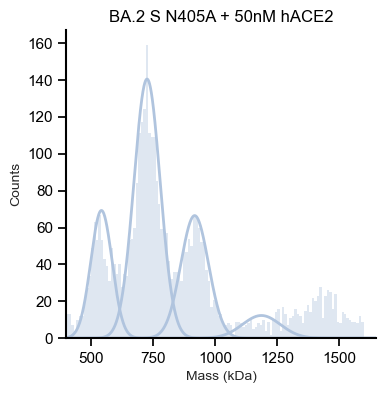

In [16]:
f, ax = plt.subplots(1, figsize=(4,4))
row = df_results1.iloc[12]
plotfit(label=row['label'],
        counts=row['counts'], 
        hbins=row['hbins'], 
        gmm=row['gmm'], 
        x_axis=row['x_axis'], 
        y_axes=row['y_axes'], 
        hmin=row['hmin'], 
        hmax=row['hmax'], 
        run=row['run'], 
        mean=row['mean'],
        weights=row['weights'], 
        ax=ax)
# base_directory = r'C:\Users\jackt\Documents\Notebooks'
# file_name = 'histogram3.svg'
# output_file_name = os.path.join(base_directory, file_name)

#print(output_file_name)
#f.savefig(output_file_name, dpi=600)
   

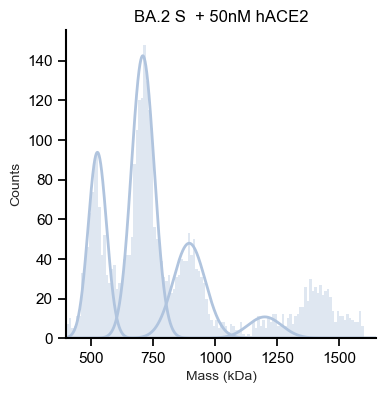

In [17]:
f, ax = plt.subplots(1, figsize=(4,4))
row = df_results2.iloc[2]
plotfit(label=row['label'],
        counts=row['counts'], 
        hbins=row['hbins'], 
        gmm=row['gmm'], 
        x_axis=row['x_axis'], 
        y_axes=row['y_axes'], 
        hmin=row['hmin'], 
        hmax=row['hmax'], 
        run=row['run'], 
        mean=row['mean'],
        weights=row['weights'], 
        ax=ax)
# base_directory = r'C:\Users\jackt\Documents\Notebooks'
# file_name = 'histogram4.svg'
# output_file_name = os.path.join(base_directory, file_name)

# print(output_file_name)
# f.savefig(output_file_name, dpi=600)

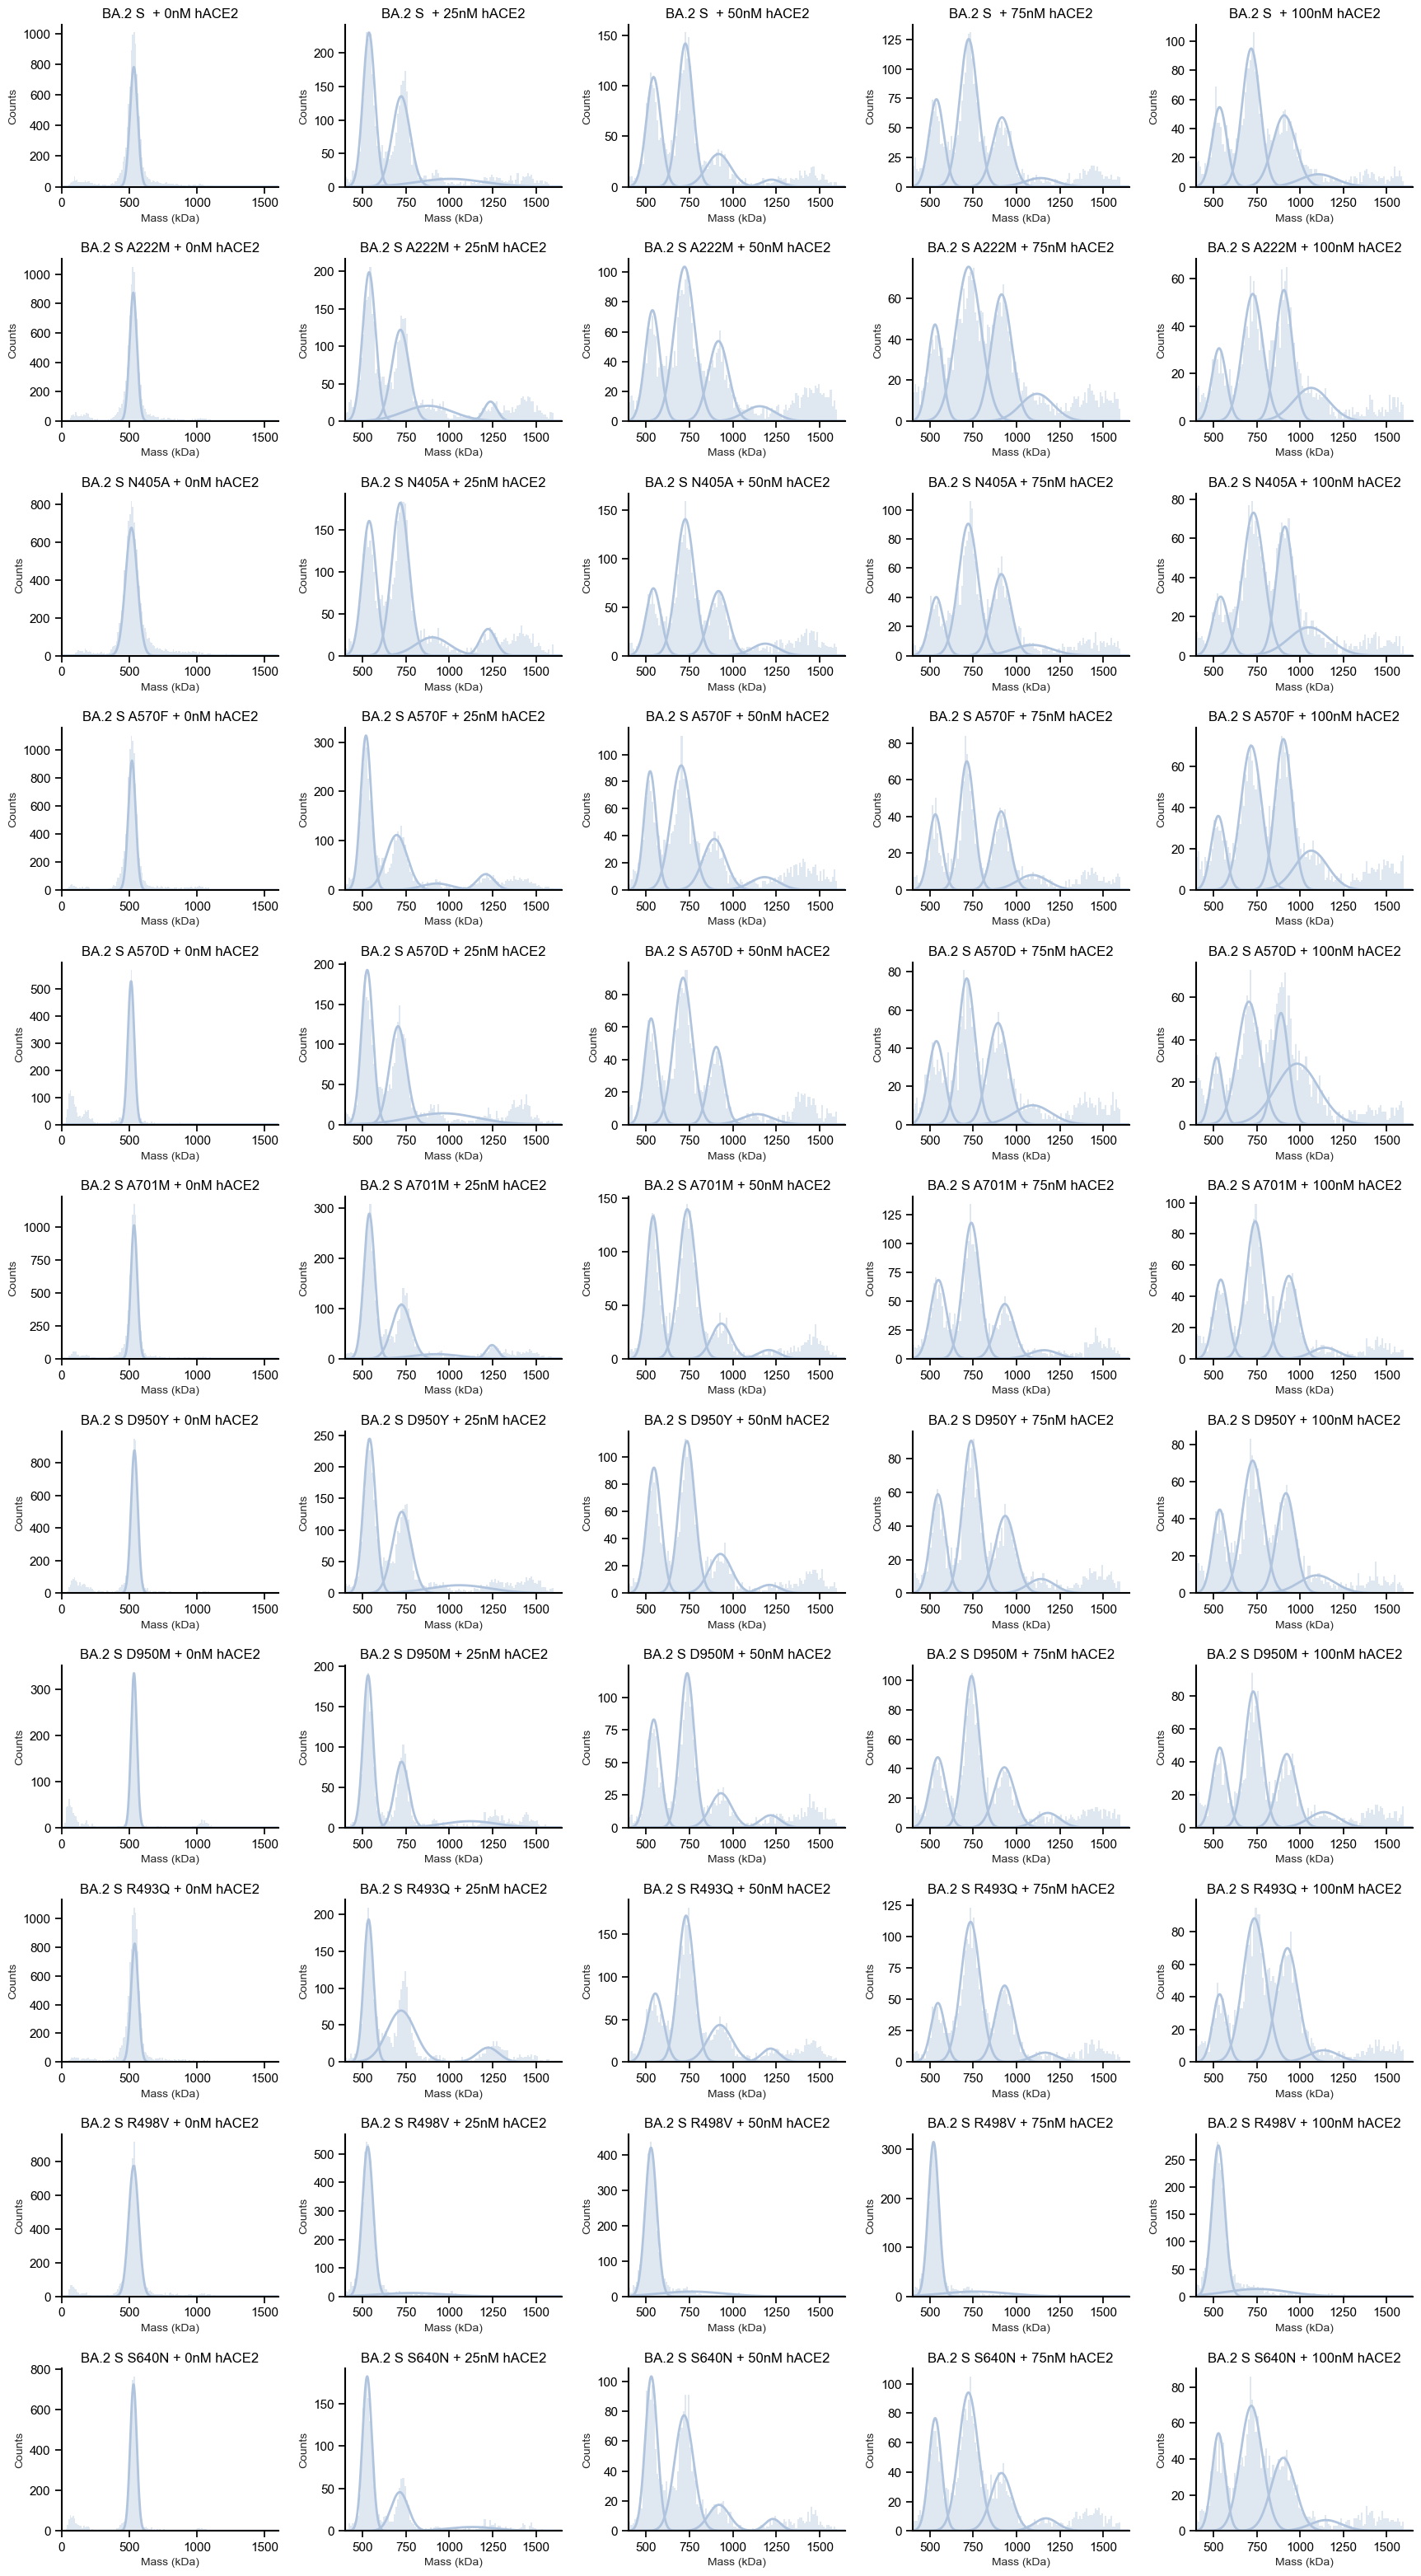

In [18]:
fig, axes = plt.subplots(11, 5, figsize=(17.5, 33))# 5x8 subplot grid1
#fig.suptitle('Replicate 1', fontsize=25)

combined_data = list(zip(sorted_runs1, df_results1.iterrows())) + list(zip(sorted_runs2, df_results2.iterrows()))

for i, (index, data_row) in enumerate(df_results1.iterrows()):
    sr = data_row['run']
    sri = sorted_runs1.index(sr)
    row = sri // 5
    col = sri % 5
    ax = axes[row,col]  # get the current axis object
    data_row = df_results1.loc[i]
    
    plotfit(label=data_row['label'],
            counts=data_row['counts'], 
            hbins=data_row['hbins'], 
            gmm=data_row['gmm'], 
            x_axis=data_row['x_axis'], 
            y_axes=data_row['y_axes'], 
            hmin=data_row['hmin'], 
            hmax=data_row['hmax'], 
            run=data_row['run'], 
            mean=data_row['mean'],
            weights=data_row['weights'], 
            ax=ax)
    
base_directory = 'Output'
os.makedirs(base_directory, exist_ok=True)
file_name = 'BA.2 histogram plot 1.svg'
output_file_name = os.path.join(base_directory, file_name)

#print(output_file_name)
fig.tight_layout(rect=[0, 0.03, 1, 0.985])
fig.savefig(output_file_name, dpi=600)

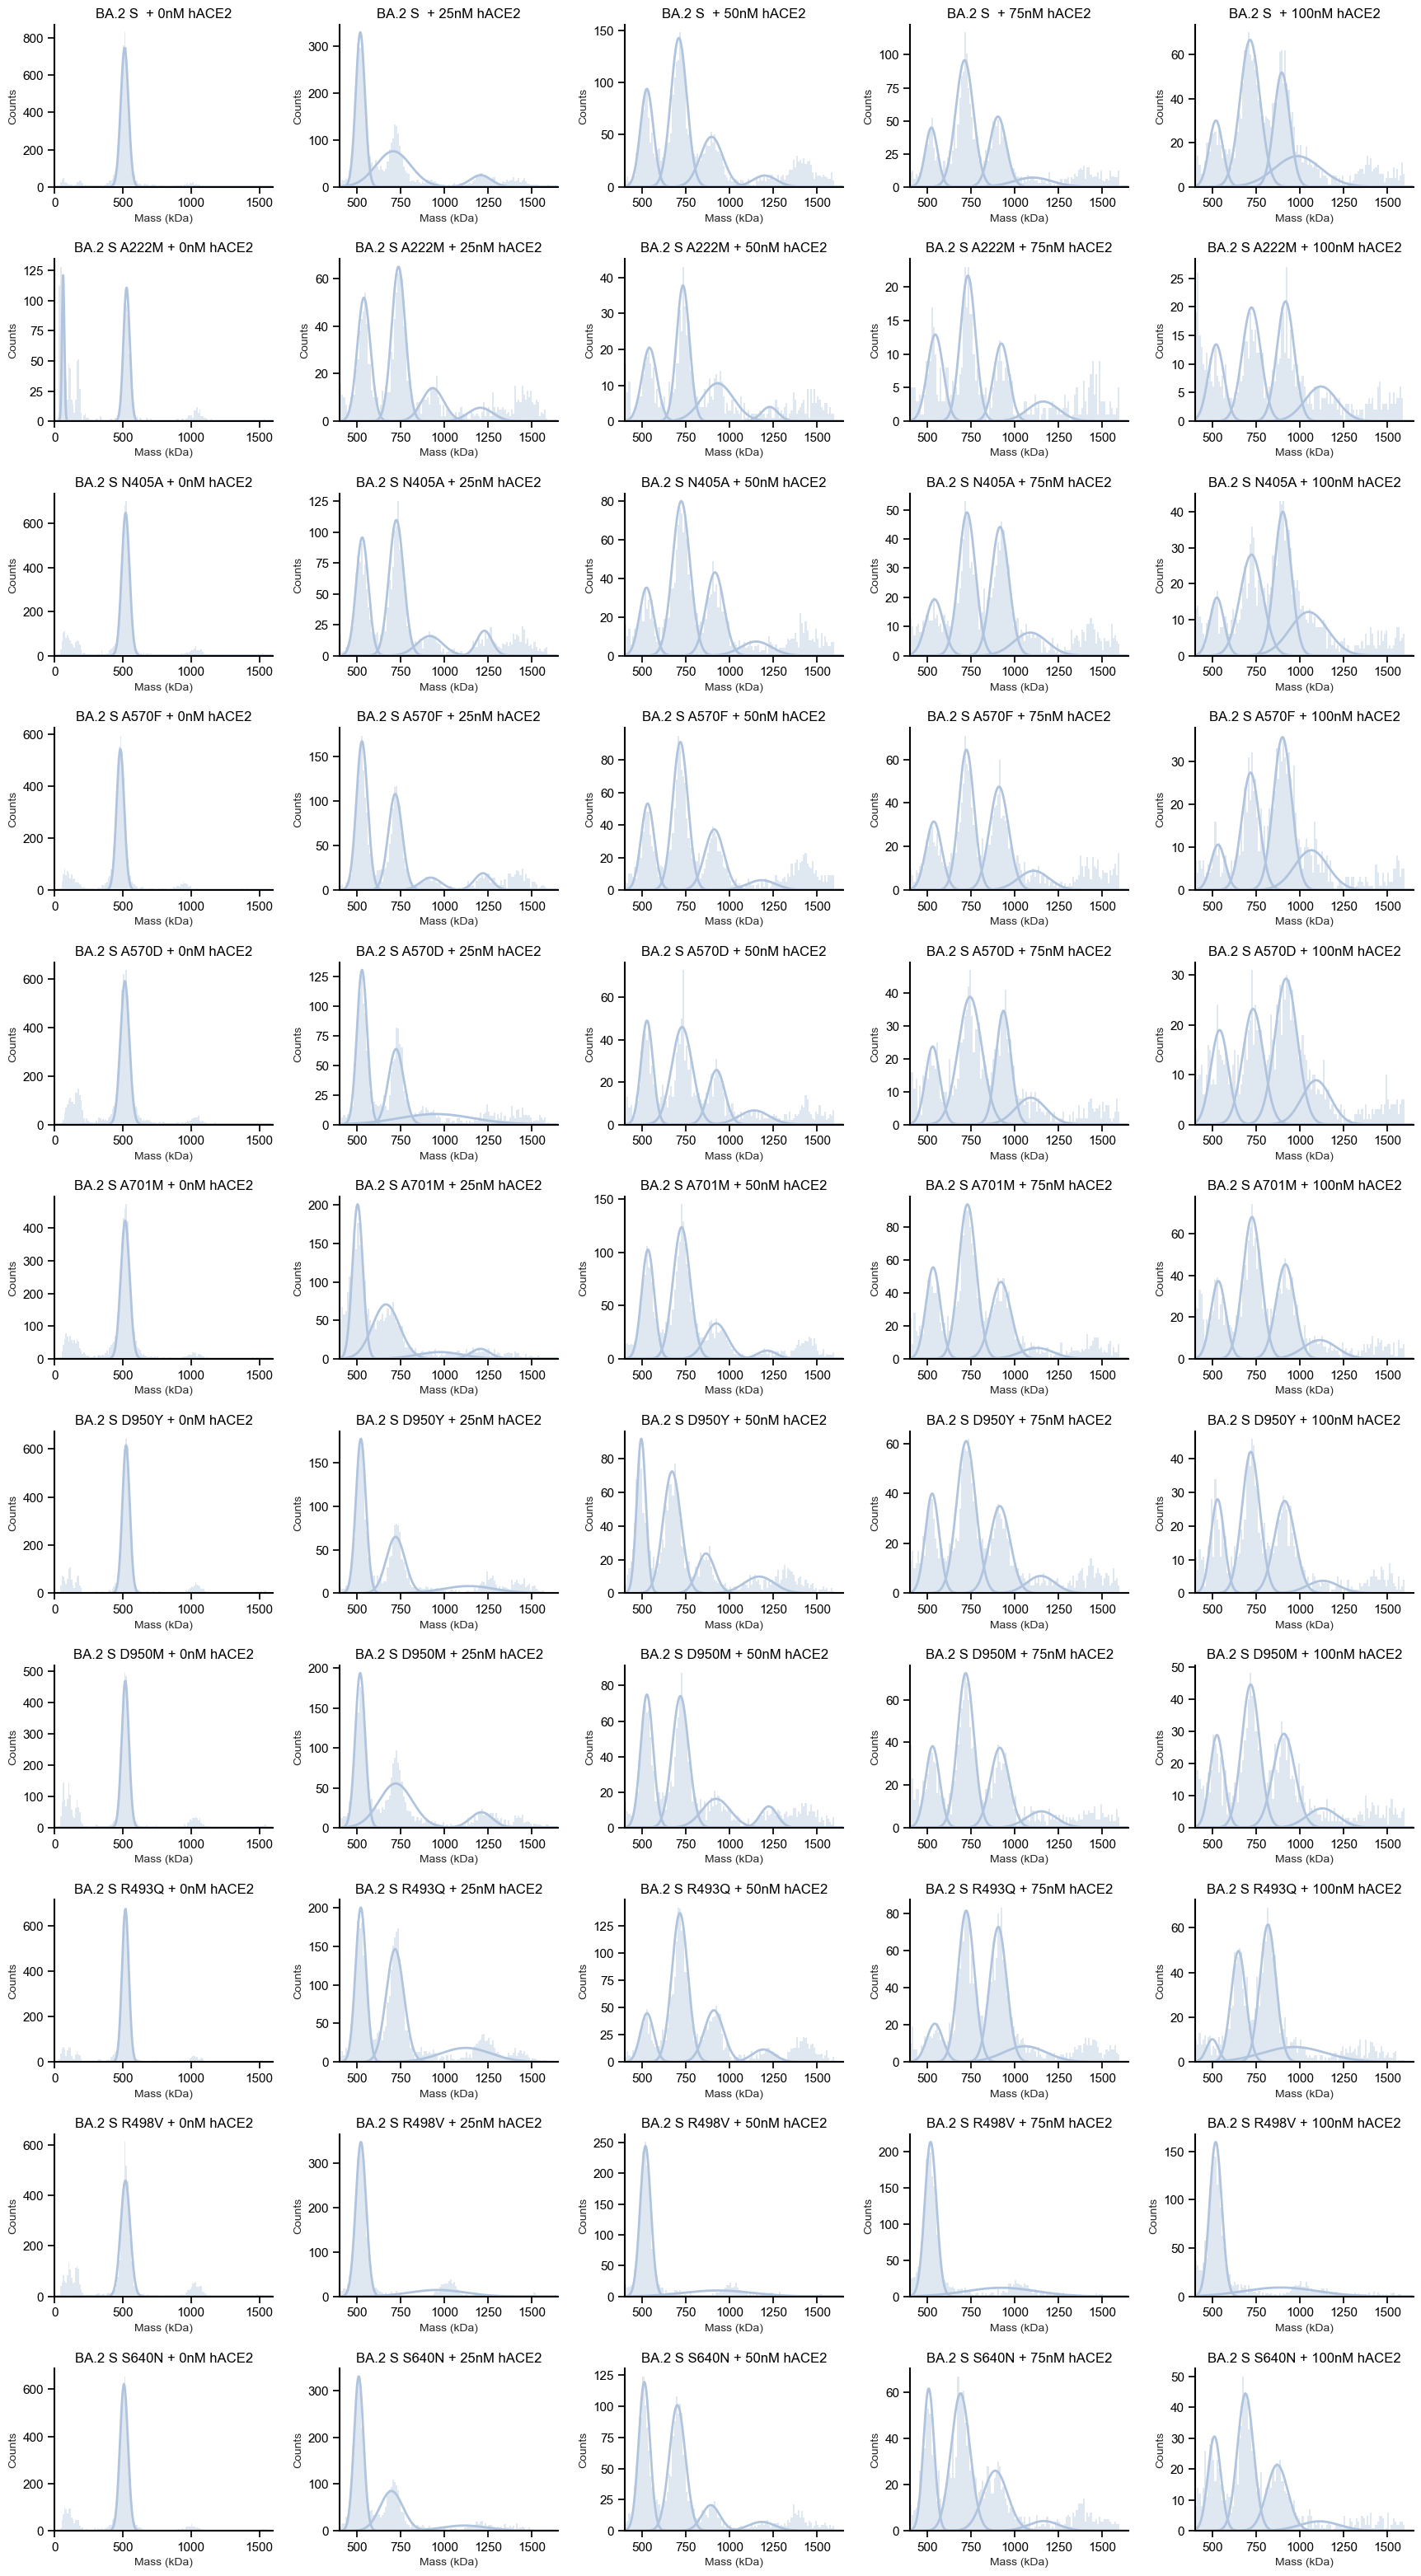

In [19]:
fig, axes = plt.subplots(11, 5, figsize=(17.5, 33))# 5x8 subplot grid1
#fig.suptitle('Replicate 2', fontsize=25)

combined_data = list(zip(sorted_runs1, df_results1.iterrows())) + list(zip(sorted_runs2, df_results2.iterrows()))

for i, (index, data_row) in enumerate(df_results2.iterrows()):
    data_row = df_results2.loc[index]
    sr = data_row['run']
    sri =sorted_runs2.index(sr)
    row = i // 5
    col = i % 5
    ax = axes[row,col]  # get the current axis object
    
    
    plotfit(label=data_row['label'],
            counts=data_row['counts'], 
            hbins=data_row['hbins'], 
            gmm=data_row['gmm'], 
            x_axis=data_row['x_axis'], 
            y_axes=data_row['y_axes'], 
            hmin=data_row['hmin'], 
            hmax=data_row['hmax'], 
            run=data_row['run'], 
            mean=data_row['mean'],
            weights=data_row['weights'], 
            ax=ax)

base_directory = 'Output'
file_name = 'BA2 histogram plot 2.svg'
output_file_name = os.path.join(base_directory, file_name)

#print(output_file_name)
fig.tight_layout(rect=[0, 0.03, 1, 0.985])
fig.savefig(output_file_name, dpi=600)

In [20]:
rmw = pd.DataFrame(run_mean_weight1)

# Explode the mean and weights columns
rmw['mean_weights'] = rmw.apply(lambda x: list(zip(x['mean'], x['weights'])), axis=1)
# Explode zipped column
rmw_exploded = rmw.explode('mean_weights')

# Reset index for further manipulations
rmw_exploded.reset_index(drop=True, inplace=True)

# Assign component number
rmw_exploded[['mean', 'weights']] = pd.DataFrame(rmw_exploded['mean_weights'].tolist(), index=rmw_exploded.index)
# Drop the zipped column
rmw_exploded = rmw_exploded.drop(columns='mean_weights')
rmw_exploded['component'] = rmw_exploded.groupby('run').cumcount() + 1

rmw_exploded['mean'] = rmw_exploded['mean'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Define the bins and labels
bins = [400, 600, 800, 1000, 1200]
labels = ['Unbound', '1 ACE2', '2 ACE2', '3 ACE2']

 # Classify each row by the 'mean' value
rmw_exploded['bin_category'] = pd.cut(rmw_exploded['mean'], bins=bins, labels=labels, right=True)

# Group by 'run' and 'bin_category', then aggregate to sum the weights
grouped = rmw_exploded.groupby(['run', 'bin_category'], observed=True)['weights'].sum().reset_index()

# Pivot the table to have 'runs' as index, binned ranges as columns, and sum of weights as values
weighbin1 = grouped.pivot(index='run', columns='bin_category', values='weights').fillna(0)

print(weighbin1)

bin_category   Unbound    1 ACE2    2 ACE2    3 ACE2
run                                                 
f13 0         0.804868  0.137455  0.000000  0.000000
f13 100       0.202066  0.430783  0.288413  0.078738
f13 25        0.465853  0.401992  0.000000  0.132155
f13 50        0.338631  0.461400  0.169827  0.000000
f13 75        0.232226  0.477167  0.240302  0.050306
f14 0         0.861132  0.000000  0.069835  0.000000
f14 100       0.150409  0.368846  0.313253  0.167492
f14 25        0.427360  0.349495  0.166880  0.000000
f14 50        0.238077  0.458994  0.236183  0.066746
f14 75        0.155169  0.444076  0.298556  0.102199
f15 0         0.905310  0.000000  0.064455  0.000000
f15 100       0.124774  0.415897  0.302614  0.156716
f15 25        0.341841  0.472751  0.110528  0.000000
f15 50        0.197240  0.492734  0.247420  0.062606
f15 75        0.155398  0.478515  0.288540  0.077547
f17 0         0.881894  0.000000  0.081293  0.000000
f17 100       0.132244  0.376896  0.327541  0.

In [21]:
rmw = pd.DataFrame(run_mean_weight2)

# Explode the mean and weights columns
rmw['mean_weights'] = rmw.apply(lambda x: list(zip(x['mean'], x['weights'])), axis=1)
# Explode zipped column
rmw_exploded = rmw.explode('mean_weights')

# Reset index for further manipulations
rmw_exploded.reset_index(drop=True, inplace=True)

# Assign component number
rmw_exploded[['mean', 'weights']] = pd.DataFrame(rmw_exploded['mean_weights'].tolist(), index=rmw_exploded.index)
# Drop the zipped column
rmw_exploded = rmw_exploded.drop(columns='mean_weights')
rmw_exploded['component'] = rmw_exploded.groupby('run').cumcount() + 1

rmw_exploded['mean'] = rmw_exploded['mean'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Define the bins and labels
bins = [400, 600, 800, 1000, 1200]
labels = ['Unbound', '1 ACE2', '2 ACE2', '3 ACE2']

 # Classify each row by the 'mean' value
rmw_exploded['bin_category'] = pd.cut(rmw_exploded['mean'], bins=bins, labels=labels, right=True)

# Group by 'run' and 'bin_category', then aggregate to sum the weights
grouped = rmw_exploded.groupby(['run', 'bin_category'], observed=True)['weights'].sum().reset_index()

# Pivot the table to have 'runs' as index, binned ranges as columns, and sum of weights as values
weighbin2 = grouped.pivot(index='run', columns='bin_category', values='weights').fillna(0)

print(weighbin2)

bin_category   Unbound    1 ACE2    2 ACE2    3 ACE2
run                                                 
f13 0         0.903516  0.000000  0.043916  0.000000
f13 100       0.128891  0.415106  0.456004  0.000000
f13 25        0.489437  0.425884  0.000000  0.000000
f13 50        0.251119  0.471566  0.224259  0.000000
f13 75        0.162547  0.498386  0.260899  0.078168
f14 0         0.415500  0.000000  0.127917  0.000000
f14 100       0.183957  0.326862  0.317798  0.171383
f14 25        0.337597  0.441707  0.151582  0.000000
f14 50        0.257190  0.408576  0.279014  0.000000
f14 75        0.253541  0.410235  0.223860  0.112364
f15 0         0.788433  0.000000  0.000000  0.058536
f15 100       0.113504  0.321355  0.336228  0.228914
f15 25        0.335451  0.459805  0.116864  0.000000
f15 50        0.170422  0.484527  0.267336  0.077715
f15 75        0.151820  0.374826  0.354140  0.119215
f17 0         0.818768  0.000000  0.057479  0.000000
f17 100       0.095016  0.302089  0.408697  0.

In [22]:
spike_values = []
for run in order:
    spike_value = MutMap[run]
    spike_values.append(spike_value)
    
ACE2_order = ["0nM hACE2", "25nM hACE2", "50nM hACE2", "75nM hACE2", "100nM hACE2"]

foccsT = pd.DataFrame(columns=spike_values)
foccs1 = pd.DataFrame(columns=spike_values)
foccs2 = pd.DataFrame(columns=spike_values)
foccs3 = pd.DataFrame(columns=spike_values)

for run in weighbin1.index:
    S, A = protein(run)
    A=A+'nM hACE2'
    
    NoACE2 = weighbin1.loc[run, 'Unbound']
    OneACE = weighbin1.loc[run, '1 ACE2']
    TwoACE = weighbin1.loc[run, '2 ACE2']
    ThrACE = weighbin1.loc[run, '3 ACE2']
    TotalSpike = NoACE2+OneACE+TwoACE+ThrACE
    
    fpctoccT = (OneACE + 2*TwoACE + 3*ThrACE) / (TotalSpike*3)
    foccsT.at[A,S] = fpctoccT

    fpctocc1 =  (OneACE + TwoACE + ThrACE) / (TotalSpike)
    foccs1.at[A,S] = fpctocc1
    
    fpctocc2 =  TwoACE + ThrACE / (TotalSpike)
    foccs2.at[A,S] = fpctocc2

    fpctocc3 =ThrACE / (TotalSpike)
    foccs3.at[A,S] = fpctocc3

duplicate_columns = foccsT.columns.duplicated()
duplicate_index = foccsT.index.duplicated()


foccsT = foccsT.reindex(index=ACE2_order, columns=spike_values)
foccs1 = foccs1.reindex(index=ACE2_order, columns=spike_values)
foccs2 = foccs2.reindex(index=ACE2_order, columns=spike_values)
foccs3 = foccs3.reindex(index=ACE2_order, columns=spike_values)


file_name1 = str("BA1 OCCT.csv")
file_name2 = str("BA1 OCC2.csv")
file_name3 = str("BA1 OCC1.csv")

base_directory = 'Output'

output_file_name1 = os.path.join(base_directory, file_name1)
output_file_name2 = os.path.join(base_directory, file_name2)
output_file_name3 = os.path.join(base_directory, file_name3)


foccsT.loc['0nM hACE2'] = 0
foccsT = foccsT.rename(columns={'': 'XBB.1.5 S'})
foccs1.loc['0nM hACE2'] = 0
foccs1 = foccs1.rename(columns={'': 'XBB.1.5 S'})
foccs2.loc['0nM hACE2'] = 0
foccs2 = foccs2.rename(columns={'': 'XBB.1.5 S'})
foccs3.loc['0nM hACE2'] = 0
foccs3 = foccs3.rename(columns={'': 'XBB.1.5 S'})


foccsT.to_csv(output_file_name1)
foccs2.to_csv(output_file_name2)
foccs1.to_csv(output_file_name3)
print(foccs3)

            XBB.1.5 S     A222M     N405A F371N     A570F     A570D G614D  \
0nM hACE2           0         0         0     0         0         0     0   
25nM hACE2   0.132155       0.0       0.0   NaN       0.0       0.0   NaN   
50nM hACE2        0.0  0.066746  0.062606   NaN   0.06691  0.056801   NaN   
75nM hACE2   0.050306  0.102199  0.077547   NaN   0.09775  0.107253   NaN   
100nM hACE2  0.078738  0.167492  0.156716   NaN  0.163318       0.0   NaN   

                A701M     D950Y     D950M     R493Q R498V     S640N  
0nM hACE2           0         0         0         0     0         0  
25nM hACE2        0.0  0.126384  0.122488       0.0   0.0   0.08137  
50nM hACE2        0.0       0.0       0.0       0.0   0.0       0.0  
75nM hACE2   0.050974  0.064056  0.070894   0.04519   0.0  0.051998  
100nM hACE2  0.056264  0.099885  0.088527  0.050245   0.0  0.055722  


In [23]:
 for run in weighbin2.index:
    if run in weighbin2.index:   
        ACE2_order = ["0nM hACE2", "25nM hACE2", "50nM hACE2", "75nM hACE2", "100nM hACE2"]

        foccsTB = pd.DataFrame(columns=spike_values)
        foccs1B = pd.DataFrame(columns=spike_values)
        foccs2B = pd.DataFrame(columns=spike_values)
        foccs3B = pd.DataFrame(columns=spike_values)
        
        for run in weighbin1.index:
            S, A = protein(run)
            A=A+'nM hACE2'

            NoACE2 = weighbin2.loc[run, 'Unbound']
            OneACE = weighbin2.loc[run, '1 ACE2']
            TwoACE = weighbin2.loc[run, '2 ACE2']
            ThrACE = weighbin2.loc[run, '3 ACE2']
            
            TotalSpike = NoACE2+OneACE+TwoACE+ThrACE

            fpctoccTB = (OneACE + 2*TwoACE + 3*ThrACE) / (TotalSpike*3)
            foccsTB.at[A,S] = fpctoccTB

            fpctocc1B =  (OneACE + TwoACE + ThrACE) / (TotalSpike)
            foccs1B.at[A,S] = fpctocc1B
            
            fpctocc2B =  TwoACE + ThrACE / (TotalSpike)
            foccs2B.at[A,S] = fpctocc2B
        
            fpctocc3B =ThrACE / (TotalSpike)
            foccs3B.at[A,S] = fpctocc3B

        # duplicate_columns = foccsT.columns.duplicated()
        # duplicate_index = foccsT.index.duplicated()

        # # Print out duplicates for inspection
        # print("Duplicate Columns:", foccsT.columns[duplicate_columns])
        # print("Duplicate Index:", foccsT.index[duplicate_index])

        
        #print(foccs.to_csv(sep='\t', index=True))
        Intindex = [0, 25, 50, 75, 100]
    else:
        print(f"Invalid index: {run}")
foccsTB = foccsTB.reindex(index=ACE2_order, columns=spike_values)
foccs1B = foccs1B.reindex(index=ACE2_order, columns=spike_values)
foccs2B = foccs2B.reindex(index=ACE2_order, columns=spike_values)
foccs3B = foccs3B.reindex(index=ACE2_order, columns=spike_values)

file_name1 = str("BA2 OCCT.csv")
file_name2 = str("BA2 OCC2.csv")
file_name3 = str("BA2 OCC1.csv")

base_directory = 'Output'
output_file_name1 = os.path.join(base_directory, file_name1)
output_file_name2 = os.path.join(base_directory, file_name2)
output_file_name3 = os.path.join(base_directory, file_name3)

foccsTB.loc['0nM hACE2'] = 0
foccsTB = foccsTB.rename(columns={'': 'XBB.1.5 S'})
foccs1B.loc['0nM hACE2'] = 0
foccs1B = foccs1B.rename(columns={'': 'XBB.1.5 S'})
foccs2B.loc['0nM hACE2'] = 0
foccs2B = foccs2B.rename(columns={'': 'XBB.1.5 S'})
foccs3B.loc['0nM hACE2'] = 0
foccs3B = foccs3B.rename(columns={'': 'XBB.1.5 S'})


foccsTB.to_csv(output_file_name1)
foccs2B.to_csv(output_file_name2)
foccs1B.to_csv(output_file_name3)
print(foccs3B)
        

            XBB.1.5 S     A222M     N405A F371N     A570F     A570D G614D  \
0nM hACE2           0         0         0     0         0         0     0   
25nM hACE2        0.0       0.0       0.0   NaN       0.0       0.0   NaN   
50nM hACE2        0.0       0.0  0.077715   NaN  0.057594  0.091207   NaN   
75nM hACE2   0.078168  0.112364  0.119215   NaN  0.102089  0.121666   NaN   
100nM hACE2       0.0  0.171383  0.228914   NaN  0.194198  0.147913   NaN   

                A701M     D950Y     D950M     R493Q R498V     S640N  
0nM hACE2           0         0         0         0     0         0  
25nM hACE2        0.0  0.124648       0.0  0.164597   0.0  0.093385  
50nM hACE2        0.0  0.105521       0.0  0.064876   0.0  0.053766  
75nM hACE2    0.06085  0.074958   0.08626  0.112911   0.0  0.050686  
100nM hACE2  0.102131  0.064437  0.092053       0.0   0.0  0.073574  


In [24]:
combined_focc1 = pd.concat([foccs1, foccs1B])
combined_focc1 = combined_focc1.drop(['G614D','F371N'], axis=1)

#print(combined_focc1)
mean_focc1 = combined_focc1.groupby(combined_focc1.index).mean()
sem_focc1 = combined_focc1.groupby(combined_focc1.index).sem()

mean_focc1 = mean_focc1.reindex(index=ACE2_order)
mean_focc1.index = Intindex
sem_focc1 = sem_focc1.reindex(index=ACE2_order)
sem_focc1.index = Intindex
print(mean_focc1)
print(sem_focc1)

    XBB.1.5 S     A222M     N405A     A570F     A570D     A701M     D950Y  \
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25   0.499716  0.592249   0.63136  0.471623  0.558562  0.484537  0.497386   
50   0.692828   0.74485  0.816169  0.750399  0.739878  0.664041  0.678088   
75   0.802614  0.795645  0.846391  0.800464  0.813408  0.758233  0.773078   
100  0.834521  0.832817  0.880861   0.88637  0.853345   0.80088  0.804155   

        D950M     R493Q     R498V     S640N  
0         0.0       0.0       0.0       0.0  
25   0.471479  0.565609  0.152614  0.404146  
50   0.656162  0.799383  0.179934  0.607181  
75   0.789849  0.870695  0.208141  0.743225  
100  0.791602  0.907053  0.228107  0.779854  
     XBB.1.5 S     A222M     N405A     A570F     A570D     A701M     D950Y  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25    0.034432  0.045088  0.000870  0.016740  0.013008  0.043333  0.019797   
50    0.041983  0.017073  0

In [25]:
combined_foccT = pd.concat([foccsT, foccsTB])
combined_foccT = combined_foccT.drop(['G614D','F371N'], axis=1)
#print(combined_focc1)
mean_foccT = combined_foccT.groupby(combined_foccT.index).mean()
sem_foccT = combined_foccT.groupby(combined_foccT.index).sem()

mean_foccT = mean_foccT.reindex(index=ACE2_order)
mean_foccT.index = Intindex
sem_foccT = sem_foccT.reindex(index=ACE2_order)
sem_foccT.index = Intindex
print(mean_foccT)
print(sem_foccT)

    XBB.1.5 S     A222M     N405A     A570F     A570D     A701M     D950Y  \
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25   0.210624  0.254027  0.251719  0.181403  0.252216  0.189823  0.249473   
50   0.299597  0.359116  0.404623  0.367192  0.364279   0.27414  0.314734   
75   0.393896  0.423805  0.454831  0.437592  0.442461  0.369238    0.3931   
100  0.428489  0.495739  0.528637  0.537335  0.488358  0.414203  0.422853   

        D950M     R493Q     R498V     S640N  
0         0.0       0.0       0.0       0.0  
25   0.197989  0.243402  0.081404  0.192967  
50   0.275771  0.361344  0.094254   0.25803  
75   0.400501  0.451915  0.111265  0.359614  
100  0.419744  0.481273  0.119215  0.395914  
     XBB.1.5 S     A222M     N405A     A570F     A570D     A701M     D950Y  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25    0.055529  0.012697  0.001731  0.007741  0.002517  0.016323  0.007178   
50    0.024281  0.018083  0

In [26]:
combined_focc2 = pd.concat([foccs2, foccs2B])
combined_focc2 = combined_focc2.drop(['G614D','F371N'], axis=1)
#print(combined_focc1)
mean_focc2 = combined_focc2.groupby(combined_focc1.index).mean()
sem_focc2 = combined_focc2.groupby(combined_focc1.index).sem()

mean_focc2 = mean_focc2.reindex(index=ACE2_order)
mean_focc2.index = Intindex
sem_focc2 = sem_focc2.reindex(index=ACE2_order)
sem_focc2.index = Intindex
print(mean_focc2)
print(sem_focc2)

    XBB.1.5 S     A222M     N405A     A570F     A570D     A701M     D950Y  \
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25   0.066077  0.159231  0.113696  0.066639  0.198086  0.080382  0.125516   
50   0.197043  0.290971  0.327538  0.288925  0.278955  0.152904  0.210401   
75   0.314837  0.368489  0.419721  0.412393  0.399514  0.293568  0.336716   
100  0.411577  0.484963  0.512236  0.546877  0.537772   0.36253  0.382243   

        D950M     R493Q     R498V     S640N  
0         0.0       0.0       0.0       0.0  
25   0.061244  0.082299  0.091598  0.087378  
50   0.160414  0.246872  0.102829  0.137706  
75   0.333077     0.406  0.125654  0.284274  
100   0.37734  0.511644  0.129539   0.34324  
     XBB.1.5 S     A222M     N405A     A570F     A570D     A701M     D950Y  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25    0.066077  0.007649  0.003168  0.006055  0.020559  0.005278  0.000868   
50    0.027216  0.011957  0

In [27]:
combined_focc3 = pd.concat([foccs3, foccs3B])
combined_focc3 = combined_focc3.drop(['G614D','F371N'], axis=1)
#print(combined_focc1)
mean_focc3 = combined_focc3.groupby(combined_focc1.index).mean()
sem_focc3 = combined_focc3.groupby(combined_focc1.index).sem()

mean_focc3 = mean_focc3.reindex(index=ACE2_order)
mean_focc3.index = Intindex
sem_focc3 = sem_focc3.reindex(index=ACE2_order)
sem_focc3.index = Intindex
print(mean_focc3)
print(sem_focc3)

    XBB.1.5 S     A222M     N405A     A570F     A570D     A701M     D950Y  \
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25   0.066077       0.0       0.0       0.0       0.0       0.0  0.125516   
50        0.0  0.033373   0.07016  0.062252  0.074004       0.0  0.052761   
75   0.064237  0.107282  0.098381   0.09992   0.11446  0.055912  0.069507   
100  0.039369  0.169438  0.192815  0.178758  0.073956  0.079198  0.082161   

        D950M     R493Q R498V     S640N  
0         0.0       0.0   0.0       0.0  
25   0.061244  0.082299   0.0  0.087378  
50        0.0  0.032438   0.0  0.026883  
75   0.078577  0.079051   0.0  0.051342  
100   0.09029  0.025122   0.0  0.064648  
     XBB.1.5 S     A222M     N405A     A570F     A570D     A701M     D950Y  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25    0.066077  0.000000  0.000000  0.000000  0.000000  0.000000  0.000868   
50    0.000000  0.033373  0.007554  0.004658  0.017

Output/BA2fitplot1.svg


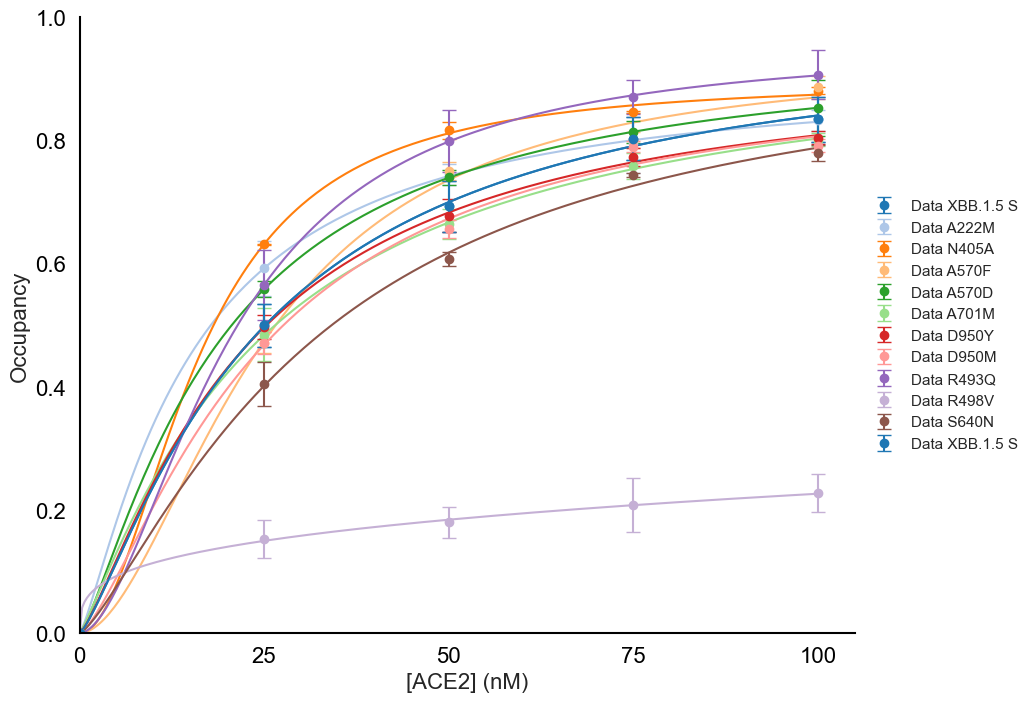

In [28]:
concentration = np.array([0, 25, 50, 75, 100])

# Define the Hill equation
def hill_equation(x, Bmax, Kd, nH):
    epsilon = 1e-10  # Add a small number to avoid division by zero
    return Bmax * x**nH / (Kd**nH + x**nH + epsilon)

# Set up the figure for plotting
plt.figure(figsize=(10, 8))

# Colors for each variant
colors = plt.cm.tab20.colors[:16]

# Loop over each column in the DataFrame to plot
for (variant, color) in zip(mean_focc1.columns, colors):
    occupancy = mean_focc1[variant].values
    errors = sem_focc1[variant].values
    
    # Bounds for curve_fit to ensure parameters are positive
    bounds = (0, [np.inf, np.inf, np.inf])
    # Initial guess for the fitting parameters
    initial_guess = [max(occupancy), np.median(concentration), 1]
    # Fit the Hill equation to the data
    popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)
    
    # Plot the error bars for each data point
    plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', label=f'Data {variant}', color=color, capsize=5)
    
    # Generate a smooth line for the fitted curve
    x_smooth = np.linspace(min(concentration), max(concentration), 300)
    y_smooth = hill_equation(x_smooth, *popt)
    
    # Plot the fitted curve
    plt.plot(x_smooth, y_smooth, color=color, label='_nolegend_')
    
first_variant = mean_focc1.columns[0]
first_color = colors[0]
occupancy = mean_focc1[first_variant].values
errors = sem_focc1[first_variant].values

bounds = (0, [np.inf, np.inf, np.inf])
initial_guess = [max(occupancy), np.median(concentration), 1]
popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)

plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', capsize=5, label=f'Data {first_variant}', color=first_color)

x_smooth = np.linspace(min(concentration), max(concentration), 300)
y_smooth = hill_equation(x_smooth, *popt)

plt.plot(x_smooth, y_smooth, color=first_color, label='_nolegend_')


# Plot formatting
plt.gca().set_facecolor('white')
plt.xlabel('[ACE2] (nM)', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.grid(True)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0, 105)  # Adjusted the x-limit to match the concentration data
plt.ylim(0, 1)    # Adjusted the y-limit to match the occupancy range
plt.tick_params(colors='black', axis='both', labelsize=16)
plt.xticks([0, 25, 50, 75, 100], ['0', '25', '50', '75', '100'])

# Add the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
base_directory = 'Output'
file_name = 'BA2fitplot1.svg'
output_file_name = os.path.join(base_directory, file_name)
print(output_file_name)
plt.savefig(output_file_name, dpi=1200)
# Show the plot
plt.show()


Output/BA2fitplot2.svg


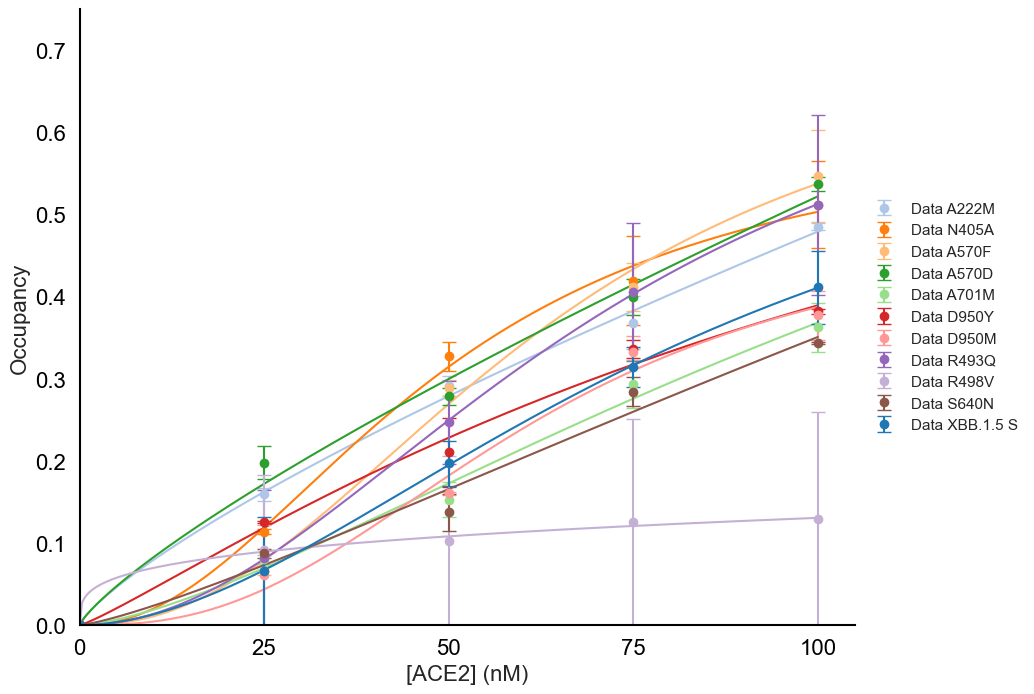

In [29]:
concentration = np.array([0, 25, 50, 75, 100])

# Define the Hill equation
def hill_equation(x, Bmax, Kd, nH):
    epsilon = 1e-10  # Add a small number to avoid division by zero
    return Bmax * x**nH / (Kd**nH + x**nH + epsilon)

# Set up the figure for plotting
plt.figure(figsize=(10, 8))

# Colors for each variant
colors = plt.cm.tab20.colors[:14]

# Loop over each column in the DataFrame to plot
for (variant, color) in zip(mean_focc2.columns[1:], colors[1:]):
    occupancy = mean_focc2[variant].values
    errors = sem_focc2[variant].values
    
    # Bounds for curve_fit to ensure parameters are positive
    bounds = (0, [np.inf, np.inf, np.inf])
    # Initial guess for the fitting parameters
    initial_guess = [max(occupancy), np.median(concentration), 1]
    # Fit the Hill equation to the data
    popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)
    
    # Plot the error bars for each data point
    plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', label=f'Data {variant}', color=color, capsize=5)
    
    # Generate a smooth line for the fitted curve
    x_smooth = np.linspace(min(concentration), max(concentration), 300)
    y_smooth = hill_equation(x_smooth, *popt)
    
    # Plot the fitted curve
    plt.plot(x_smooth, y_smooth, color=color, label='_nolegend_')
    
first_variant = mean_focc2.columns[0]
first_color = colors[0]
occupancy = mean_focc2[first_variant].values
errors = sem_focc2[first_variant].values

bounds = (0, [np.inf, np.inf, np.inf])
initial_guess = [max(occupancy), np.median(concentration), 1]
popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)

plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', capsize=5, label=f'Data {first_variant}', color=first_color)

x_smooth = np.linspace(min(concentration), max(concentration), 300)
y_smooth = hill_equation(x_smooth, *popt)

plt.plot(x_smooth, y_smooth, color=first_color, label='_nolegend_')


# Plot formatting
plt.gca().set_facecolor('white')
plt.xlabel('[ACE2] (nM)', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.grid(True)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0, 105)  # Adjusted the x-limit to match the concentration data
plt.ylim(0, 0.75)    # Adjusted the y-limit to match the occupancy range
plt.tick_params(colors='black', axis='both', labelsize=16)
plt.xticks([0, 25, 50, 75, 100], ['0', '25', '50', '75', '100'])

# Add the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

base_directory = 'Output'
file_name = 'BA2fitplot2.svg'
output_file_name = os.path.join(base_directory, file_name)
print(output_file_name)
plt.savefig(output_file_name, dpi=1200)

# Show the plot
plt.show()


Output/BA2fitplot3.svg


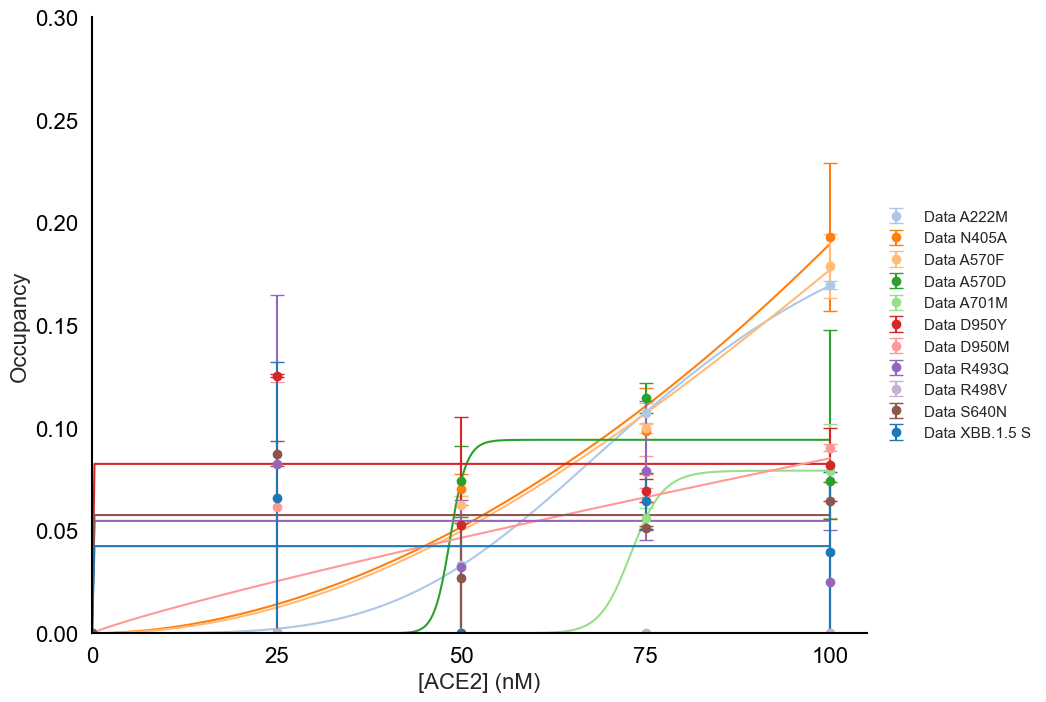

In [30]:
concentration = np.array([0, 25, 50, 75, 100])

# Define the Hill equation
def hill_equation(x, Bmax, Kd, nH):
    epsilon = 1e-10  # Add a small number to avoid division by zero
    return Bmax * x**nH / (Kd**nH + x**nH + epsilon)

# Set up the figure for plotting
plt.figure(figsize=(10, 8))

# Colors for each variant
colors = plt.cm.tab20.colors[:14]

# Loop over each column in the DataFrame to plot
for (variant, color) in zip(mean_focc3.columns[1:], colors[1:]):
    occupancy = mean_focc3[variant].values
    errors = sem_focc3[variant].values
    
    # Bounds for curve_fit to ensure parameters are positive
    bounds = (0, [np.inf, np.inf, np.inf])
    # Initial guess for the fitting parameters
    initial_guess = [max(occupancy), np.median(concentration), 1]
    # Fit the Hill equation to the data
    popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)
    
    # Plot the error bars for each data point
    plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', label=f'Data {variant}', color=color, capsize=5)
    
    # Generate a smooth line for the fitted curve
    x_smooth = np.linspace(min(concentration), max(concentration), 300)
    y_smooth = hill_equation(x_smooth, *popt)
    
    # Plot the fitted curve
    plt.plot(x_smooth, y_smooth, color=color, label='_nolegend_')
    
first_variant = mean_focc3.columns[0]
first_color = colors[0]
occupancy = mean_focc3[first_variant].values
errors = sem_focc3[first_variant].values

bounds = (0, [np.inf, np.inf, np.inf])
initial_guess = [max(occupancy), np.median(concentration), 1]
popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)

plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', capsize=5, label=f'Data {first_variant}', color=first_color)

x_smooth = np.linspace(min(concentration), max(concentration), 300)
y_smooth = hill_equation(x_smooth, *popt)

plt.plot(x_smooth, y_smooth, color=first_color, label='_nolegend_')


# Plot formatting
plt.gca().set_facecolor('white')
plt.xlabel('[ACE2] (nM)', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.grid(True)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0, 105)  # Adjusted the x-limit to match the concentration data
plt.ylim(0, 0.3)    # Adjusted the y-limit to match the occupancy range
plt.tick_params(colors='black', axis='both', labelsize=16)
plt.xticks([0, 25, 50, 75, 100], ['0', '25', '50', '75', '100'])

# Add the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

base_directory = 'Output'
file_name = 'BA2fitplot3.svg'
output_file_name = os.path.join(base_directory, file_name)
print(output_file_name)
plt.savefig(output_file_name, dpi=1200)

# Show the plot
plt.show()


Output/BA2fitplotT.svg


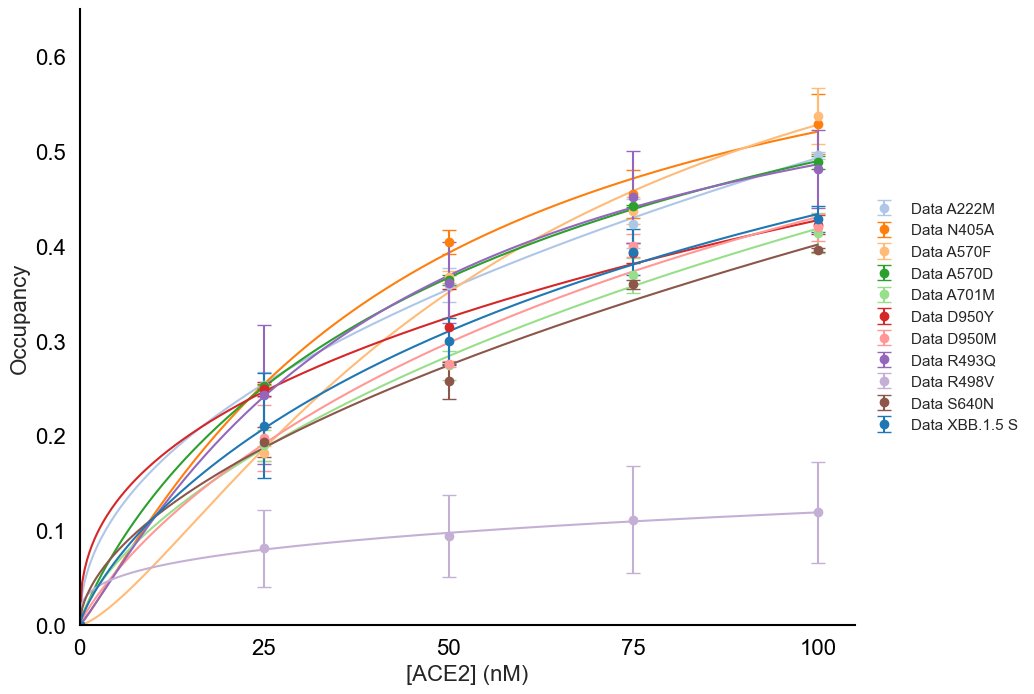

In [31]:
concentration = np.array([0, 25, 50, 75, 100])

# Define the Hill equation
def hill_equation(x, Bmax, Kd, nH):
    epsilon = 1e-10  # Add a small number to avoid division by zero
    return Bmax * x**nH / (Kd**nH + x**nH + epsilon)

# Set up the figure for plotting
plt.figure(figsize=(10, 8))

# Colors for each variant
colors = plt.cm.tab20.colors[:14]

# Loop over each column in the DataFrame to plot
for (variant, color) in zip(mean_foccT.columns[1:], colors[1:]):
    occupancy = mean_foccT[variant].values
    errors = sem_foccT[variant].values
    
    # Bounds for curve_fit to ensure parameters are positive
    bounds = (0, [np.inf, np.inf, np.inf])
    # Initial guess for the fitting parameters
    initial_guess = [max(occupancy), np.median(concentration), 1]
    # Fit the Hill equation to the data
    popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)
    
    # Plot the error bars for each data point
    plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', label=f'Data {variant}', color=color, capsize=5)
    
    # Generate a smooth line for the fitted curve
    x_smooth = np.linspace(min(concentration), max(concentration), 300)
    y_smooth = hill_equation(x_smooth, *popt)
    
    # Plot the fitted curve
    plt.plot(x_smooth, y_smooth, color=color, label='_nolegend_')
    
first_variant = mean_foccT.columns[0]
first_color = colors[0]
occupancy = mean_foccT[first_variant].values
errors = sem_foccT[first_variant].values

bounds = (0, [np.inf, np.inf, np.inf])
initial_guess = [max(occupancy), np.median(concentration), 1]
popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)

plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', capsize=5, label=f'Data {first_variant}', color=first_color)

x_smooth = np.linspace(min(concentration), max(concentration), 300)
y_smooth = hill_equation(x_smooth, *popt)

plt.plot(x_smooth, y_smooth, color=first_color, label='_nolegend_')


# Plot formatting
plt.gca().set_facecolor('white')
plt.xlabel('[ACE2] (nM)', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.grid(True)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0, 105)  # Adjusted the x-limit to match the concentration data
plt.ylim(0, 0.65)    # Adjusted the y-limit to match the occupancy range
plt.tick_params(colors='black', axis='both', labelsize=16)
plt.xticks([0, 25, 50, 75, 100], ['0', '25', '50', '75', '100'])

# Add the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

base_directory = 'Output'
file_name = 'BA2fitplotT.svg'
output_file_name = os.path.join(base_directory, file_name)
print(output_file_name)
plt.savefig(output_file_name, dpi=1200)

# Show the plot
plt.show()
